# Handwritten Digit Recognition Project


# Importing required libraries


In [1]:
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset
We are importing MNIST dataset and dividing data for training and testing of the model. `x_train` and `x_test` are the input data (images) for training and testing, respectively.
`y_train` and `y_test` are the labels (target values) for the training and testing data, respectively

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


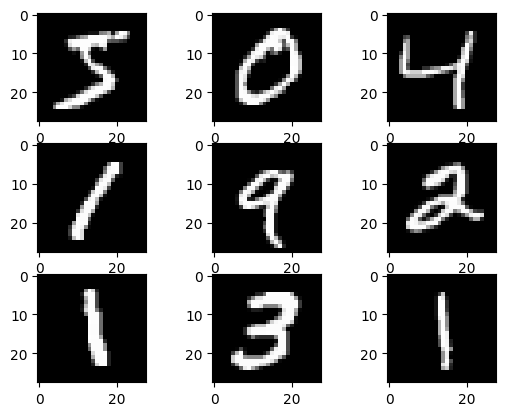

In [3]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# The Data Preprocessing
We need to perform some basic operations and process the data to make it ready for our neural network.
The current data is in 2D format with each image of dimension (28, 28), but CNN accepts data in 3D format so we need to reshape the data to add an extra dimenssion to make it (28, 28, 1).


## Reshaping the data
The `reshape` function is used to change the shape of the input data.

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


## Classification of data
We are now classifying the data into different categories. Since the dataset consists of handwritten digites from 0 to 9 we classify our data into 10 categories.

In [5]:
input_shape = (28, 28, 1)
num_classes = 10


## One-hot encoding
One-hot encoding is a technique used in classification tasks to convert categorical labels into a binary matrix representation. Each row in the matrix corresponds to a sample, and each column corresponds to a class. The column corresponding to the true class is marked with a 1, and the others are 0.

`to_categorical` function from Keras is used to convert class vectors to binary class matrices.
Since CNN expect data of type float32, we convert our data into the required format.

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


## Normalization of Pixel Values
The pixel values of the images are normalized by dividing them by 255.
Pixel values in typical images are often represented in the range of [0, 255], where 0 represents black and 255 represents white in an 8-bit grayscale image.
Normalizing by 255 scales the pixel values to the range [0, 1]. This is useful because many activation functions and optimization algorithms work more effectively when input values are within a certain range, often close to zero.

In [7]:
x_train /= 255
x_test /= 255

# Creating CNN model
## Setting Hyperparameters:
`batch_size`: The number of training examples utilized in one iteration. It's a hyperparameter that defines the number of samples to work through before updating the model's internal parameters.

`num_classes`: The total number of classes in the classification problem.

`epochs`: The number of times the entire training dataset is passed forward and backward through the neural network.

In [8]:
batch_size = 128
num_classes = 10
epochs = 10


Now we initialize sequential model, which is a linear stack of layers to which we add layers one by one in sequence.

In [9]:
model = Sequential()

## Adding Convolutional Layers
`Conv2D` is a 2D convolution layer, which is a fundamental building block in CNNs. It applies a convolution operation to the input.

Lets add first layer with 32 filters/kernels of size 3x3.

`activation='relu'`: Rectified Linear Unit (ReLU) activation function is used to introduce non-linearity.

`MaxPooling2D`: This layer is used for down-sampling or pooling. It reduces the spatial dimensions of the output volume.

`Dropout`: A regularization technique. It randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

In [10]:

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


## Flattening Layers
Flattening the input, transforming it into a one-dimensional array. This is necessary before connecting to a densely connected layer.

In [11]:
model.add(Flatten())


## Adding Dense Layers
The first dense layer has 256 units with ReLU activation.
Another dropout layer is added for regularization (to prevent overfitting).
The final dense layer has `num_classes` units with a softmax activation function. Softmax is often used in the output layer for multi-class classification problems.

In [12]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


## Compiling the Model
`compile` is used to configure the model for training.

`categorical_crossentropy` is the loss function used for multi-class classification problems.

`Adadelta` is an optimizer, which is a variant of stochastic gradient descent (SGD).
The metric to be monitored during training is accuracy.

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Model Training
Now that we have out model ready, we will start training it and keep checking accuracy.

`model.fit` is the method used to train the model.

`x_train` and `y_trai` are the training data (input features and labels).

`batch_size` is the number of samples processed in each iteration during training.

`epochs` is the number of times the model will be trained on the entire training dataset.

`verbose` controls the amount of information printed during training. Here, verbose=1 means that progress bars will be displayed.

`validation_data` is optional but if provided, it specifies the data on which to evaluate the loss and any model metrics at the end of each epoch. In this case, it's using the test data (x_test and y_test) for validation.

The training history, including loss and accuracy for both training and validation sets, is stored in the variable `hist`.

Once the training is complete we are saving the model with name `mnist.h5`, The ".h5" extension indicates that it's in the Hierarchical Data Format (HDF5), a common format for storing large amounts of numerical data.

In [14]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 50s 107ms/step - loss: 2.2844 - accuracy: 0.1600 - val_loss: 2.2500 - val_accuracy: 0.3800
Epoch 2/10
469/469 [==============================] - 44s 94ms/step - loss: 2.2284 - accuracy: 0.2758 - val_loss: 2.1798 - val_accuracy: 0.5841
Epoch 3/10
469/469 [==============================] - 43s 93ms/step - loss: 2.1511 - accuracy: 0.4052 - val_loss: 2.0760 - val_accuracy: 0.6607
Epoch 4/10
469/469 [==============================] - 52s 110ms/step - loss: 2.0335 - accuracy: 0.5034 - val_loss: 1.9165 - val_accuracy: 0.7076
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 1.8588 - accuracy: 0.5692 - val_loss: 1.6835 - val_accuracy: 0.7603
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 1.6257 - accuracy: 0.6184 - val_loss: 1.3957 - val_accuracy: 0.7874
Epoch 7/10
469/469 [==============================] - 52s 110ms/step - loss: 1.3762 - accuracy: 0.6546 - val_loss: 1.1203 - val_accu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Evaluation
To evaluate how accurate our model works, we have around 10,000 images in our dataset. In the training of the data model, we do not include the testing data that’s why it is new data for our model.

`model.evaluate` is used to evaluate the model on a given dataset.

`x_test` and `y_test` are the test data (input features and labels).

`verbose=0` means that no progress bar or additional information will be printed during evaluation.

In [15]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.6612 - accuracy: 0.8525
Test loss: 0.6612124443054199
Test accuracy: 0.8525000214576721


1/1 [==============================] - 0s 68ms/step
Sample 1: Actual Label = 1, Predicted Label = 1


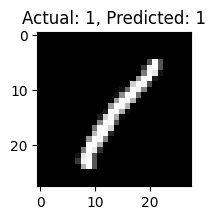

1/1 [==============================] - 0s 10ms/step
Sample 2: Actual Label = 4, Predicted Label = 4


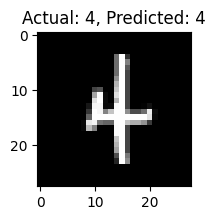

1/1 [==============================] - 0s 8ms/step
Sample 3: Actual Label = 3, Predicted Label = 3


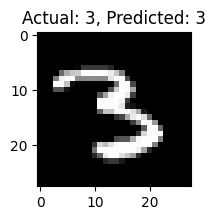

1/1 [==============================] - 0s 28ms/step
Sample 4: Actual Label = 9, Predicted Label = 9


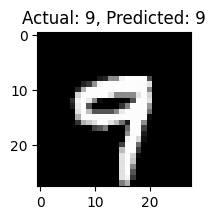

1/1 [==============================] - 0s 9ms/step
Sample 5: Actual Label = 9, Predicted Label = 9


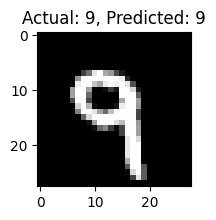

1/1 [==============================] - 0s 8ms/step
Sample 6: Actual Label = 1, Predicted Label = 1


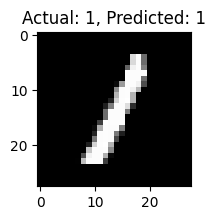

1/1 [==============================] - 0s 9ms/step
Sample 7: Actual Label = 4, Predicted Label = 4


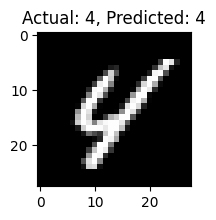

1/1 [==============================] - 0s 8ms/step
Sample 8: Actual Label = 2, Predicted Label = 2


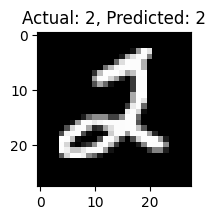

1/1 [==============================] - 0s 8ms/step
Sample 9: Actual Label = 9, Predicted Label = 9


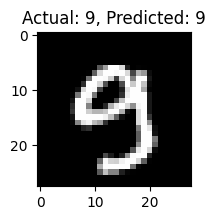

1/1 [==============================] - 0s 8ms/step
Sample 10: Actual Label = 2, Predicted Label = 2


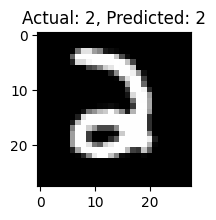

In [16]:
import numpy as np
num_samples = 10
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(sample_indices):
    sample_img = x_test[idx]
    sample_label = y_test[idx]
    
    sample_img_reshaped = sample_img.reshape(1, 28, 28, 1)
    
    predicted_label = model.predict(sample_img_reshaped)
    predicted_digit = np.argmax(predicted_label)
    
    print(f"Sample {i + 1}: Actual Label = {np.argmax(sample_label)}, Predicted Label = {predicted_digit}")
    

    plt.figure(figsize=(2, 2))
    plt.imshow(sample_img.reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(sample_label)}, Predicted: {predicted_digit}")
    plt.show()

The test loss indicates how well the model's predictions match the true labels, and the test accuracy represents the percentage of correctly classified samples in the test dataset.

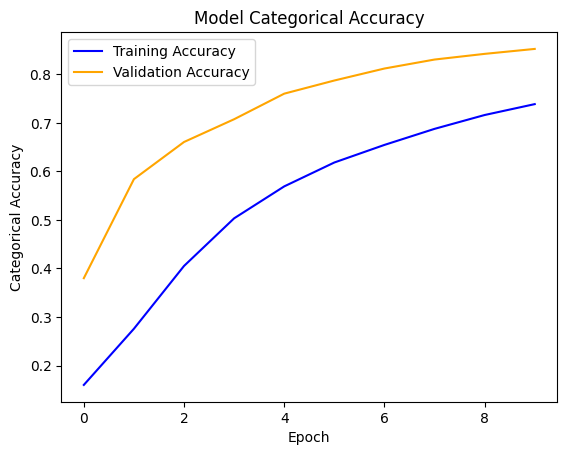

In [17]:
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Categorical Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.legend()
plt.show()

# Predicting Digits using our model and User Interface

In [18]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageTk, ImageFilter
import numpy as np
from keras.models import load_model

model = load_model('mnist.h5')

def predict_digit(img):
    img_resized = img.resize((28, 28))
    
    # convert rgb to grayscale
    img_gray = img_resized.convert('L')
    img_sharpened = img_gray.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))
    
    img_array = np.array(img_sharpened)
    
    # reshaping for model normalization
    img_reshaped = img_array.reshape(1, 28, 28, 1)
    img_normalized = img_reshaped / 255.0
    
    # predicting the class
    res = model.predict([img_normalized])[0]
    return np.argmax(res), max(res)

canvas_width, canvas_height = 400, 400
drawing = False
last_x, last_y = 0, 0

canvas_img = Image.new('RGB', (canvas_width, canvas_height), (0, 0, 0))
draw = ImageDraw.Draw(canvas_img)

def start_drawing(event):
    global drawing, last_x, last_y
    drawing = True
    last_x, last_y = event.x, event.y

def draw_line(event):
    global drawing, last_x, last_y
    if drawing:
        line_width = 45
        points = interpolate_points(last_x, last_y, event.x, event.y)
        for point in points:
            draw.ellipse([point[0]-line_width//2, point[1]-line_width//2,
                          point[0]+line_width//2, point[1]+line_width//2], fill='white')
        last_x, last_y = event.x, event.y
        update_canvas()

def stop_drawing(event):
    global drawing
    drawing = False

def update_canvas():
    img_tk = ImageTk.PhotoImage(canvas_img)
    canvas.img_tk = img_tk
    canvas.create_image(0, 0, anchor=tk.NW, image=img_tk)

def interpolate_points(x1, y1, x2, y2):
    steps = max(abs(x2 - x1), abs(y2 - y1))
    x, y = np.linspace(x1, x2, steps), np.linspace(y1, y2, steps)
    points = list(map(lambda x, y: (int(x), int(y)), x, y))
    return points

def clear_drawing():
    global canvas_img, draw
    canvas_img = Image.new('RGB', (canvas_width, canvas_height), (0, 0, 0))
    draw = ImageDraw.Draw(canvas_img)
    canvas.delete("all")

def predict_and_display():
    digit, percentage = predict_digit(canvas_img)
    result_label.config(text=f"Prediction: {digit}\nConfidence: {percentage:.2%}")

root = tk.Tk()
root.title("Digit Recognizer")

canvas = tk.Canvas(root, width=canvas_width, height=canvas_height, bg="black")
canvas.pack()

clear_button = tk.Button(root, text="Clear Drawing", command=clear_drawing)
clear_button.pack(side=tk.LEFT, padx=10)

predict_button = tk.Button(root, text="Predict Digit", command=predict_and_display)
predict_button.pack(side=tk.RIGHT, padx=10)

result_label = tk.Label(root, text="")
result_label.pack(pady=10)

canvas.bind("<B1-Motion>", draw_line)
canvas.bind("<Button-1>", start_drawing)
canvas.bind("<ButtonRelease-1>", stop_drawing)

root.mainloop()


2023-12-11 02:16:08.551 Python[5573:3338214] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
